In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel('Data_file.xlsx', header = 2)

In [ ]:
df.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [ ]:
df.shape

(1338, 9)

In [ ]:
del df['S.No.']

In [ ]:
df.shape

(1338, 8)

In [ ]:
df.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [ ]:
df.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [ ]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000


findng out the outliers

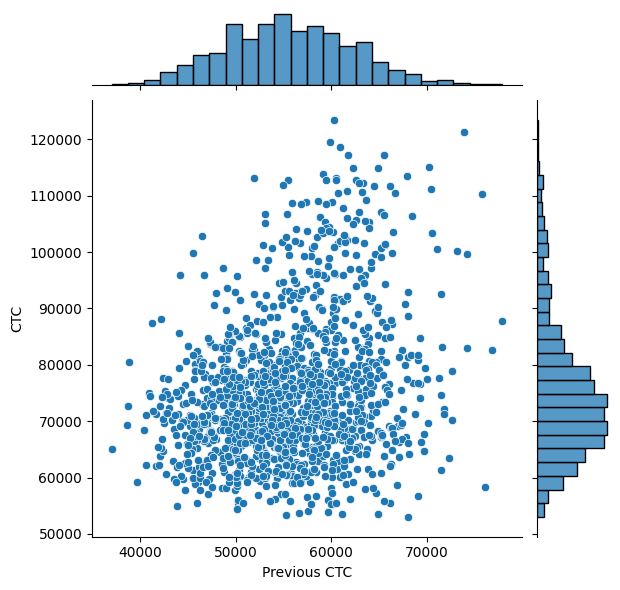

In [ ]:
sns.jointplot(x = 'Previous CTC', y = 'CTC', data = df)

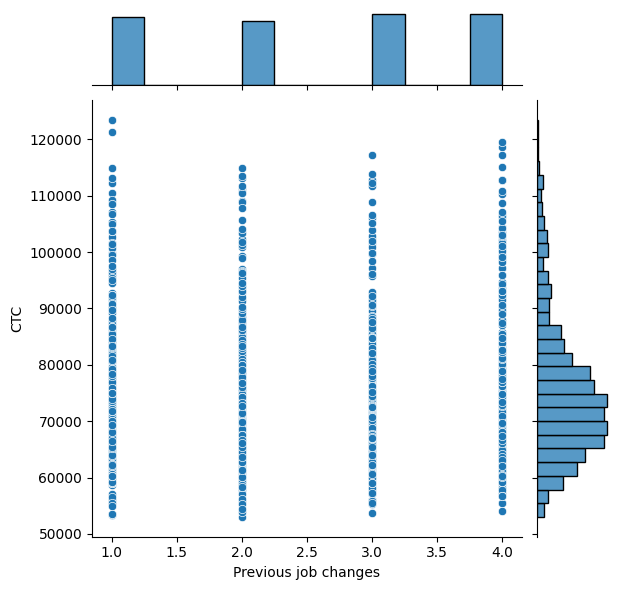

In [ ]:
sns.jointplot(x = 'Previous job changes', y = 'CTC', data = df)

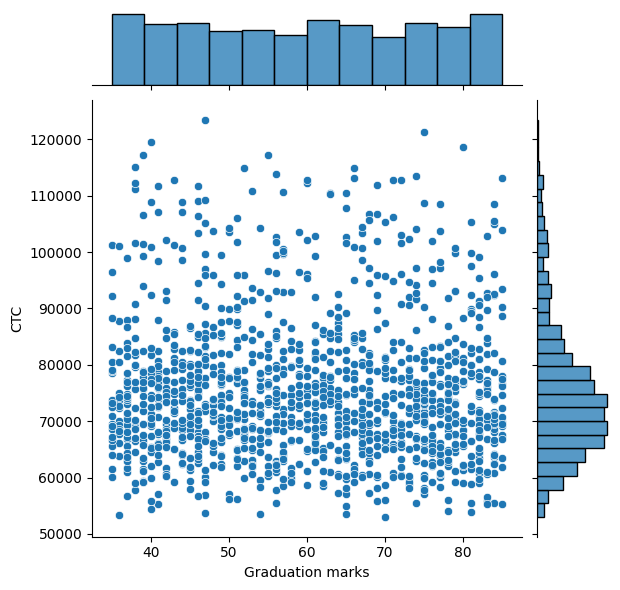

In [ ]:
sns.jointplot(x = 'Graduation marks', y = 'CTC', data = df)

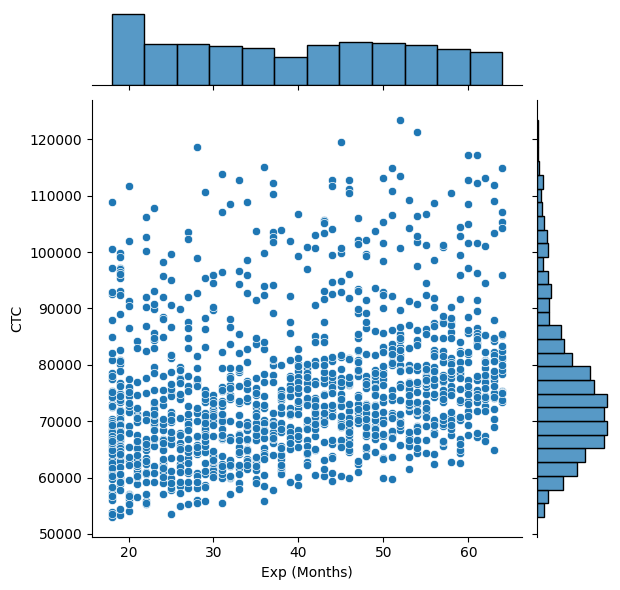

In [ ]:
sns.jointplot(x = 'Exp (Months)', y = 'CTC', data = df)

<Axes: xlabel='College', ylabel='count'>

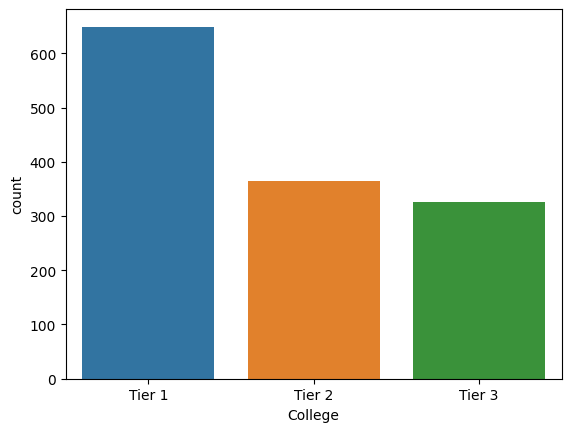

In [ ]:
sns.countplot(x ='College', data = df)

<Axes: xlabel='Role', ylabel='count'>

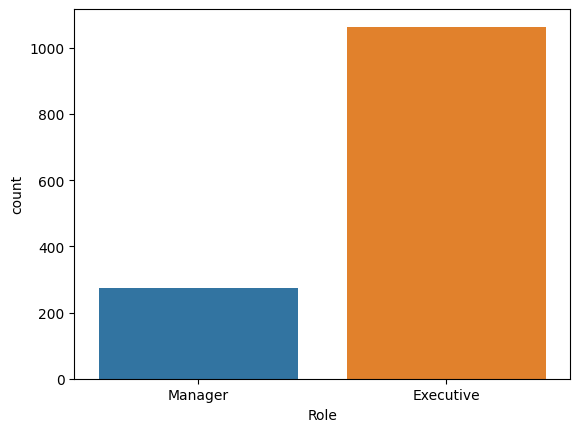

In [ ]:
sns.countplot(x ='Role', data = df)

<Axes: xlabel='City type', ylabel='count'>

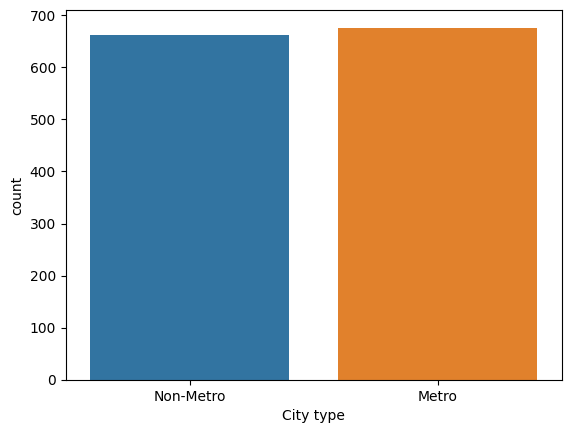

In [ ]:
sns.countplot(x ='City type', data = df)

categorial to numerical 

In [ ]:
df.rename(columns = {'Exp (Months)': 'Exp'}, inplace= True)

In [ ]:
df.rename(columns = {'College_Tier 1': 'College_T1'}, inplace= True)

In [ ]:
df.rename(columns = {'College_Tier 2': 'College_T2'}, inplace= True)

In [ ]:
df.rename(columns = {'City type_Metro': 'City_Metro'}, inplace= True)

In [ ]:
df.rename(columns = {'Previous CTC': 'previous CTC'}, inplace= True)

In [ ]:
df.rename(columns = {'Previous job changes': 'previous job changes'}, inplace= True)

In [ ]:
df_new1 = pd.get_dummies(df)

In [ ]:
df_new1.head()

,previous CTC,previous job changes,Graduation marks,Exp,CTC,College_Tier 1,College_Tier 2,College_Tier 3,Role_Executive,Role_Manager,City type_Metro,City type_Non-Metro
0,55523,3,66,19,71406.576531,1,0,0,0,1,0,1
1,57081,1,84,18,68005.870631,0,1,0,1,0,1,0
2,60347,2,52,28,76764.020277,0,1,0,1,0,1,0
3,49010,2,81,33,82092.386880,0,0,1,1,0,1,0
4,57879,4,74,32,73878.097729,0,0,1,1,0,1,0


In [ ]:
df_new1.drop(['College_Tier 3', 'Role_Executive', 'City type_Non-Metro'], axis=1 , inplace = True)

In [ ]:
df_new1.head()

,previous CTC,previous job changes,Graduation marks,Exp,CTC,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro
0,55523,3,66,19,71406.576531,1,0,1,0
1,57081,1,84,18,68005.870631,0,1,0,1
2,60347,2,52,28,76764.020277,0,1,0,1
3,49010,2,81,33,82092.386880,0,0,0,1
4,57879,4,74,32,73878.097729,0,0,0,1


In [ ]:
df_new1.drop(['CTC'], axis = 1 , inplace = True)

In [ ]:
df_new = df_new1.iloc[:,[4,5,6,7,0,1,2,3]]

In [ ]:
df_new.head()

,College_Tier 1,College_Tier 2,Role_Manager,City type_Metro,previous CTC,previous job changes,Graduation marks,Exp
0,1,0,1,0,55523,3,66,19
1,0,1,0,1,57081,1,84,18
2,0,1,0,1,60347,2,52,28
3,0,0,0,1,49010,2,81,33
4,0,0,0,1,57879,4,74,32


In [ ]:
from sklearn import preprocessing 

val = df_new.values #returns numpy array 
min_max_scaler = preprocessing.MinMaxScaler()
val_scaled = min_max_scaler.fit_transform(val)
normalised_df = pd.DataFrame(val_scaled)
normalised_df.columns = ['College_T1', 'College_T2', 'Role_Manager',	'City_Metro', 'previous CTC',	'previous job changes',	'Graduation marks',	'Exp']
normalised_df.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp
0,1.0,0.0,1.0,0.0,0.452897,0.666667,0.62,0.021739
1,0.0,1.0,0.0,1.0,0.490970,0.000000,0.98,0.000000
2,0.0,1.0,0.0,1.0,0.570783,0.333333,0.34,0.217391
3,0.0,0.0,0.0,1.0,0.293737,0.333333,0.92,0.326087
4,0.0,0.0,0.0,1.0,0.510471,1.000000,0.78,0.304348


In [ ]:
df.rename(columns = {'CTC': 'Actual CTC'}, inplace= True)

Training the model 


In [ ]:
x  = normalised_df
y = df['Actual CTC']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

Testing the model 

In [ ]:
data_test = pd.read_excel('Test_data_file.xlsx')
data_test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN


In [ ]:
data_test = data_test.drop(['College', 'Role', 'City type', 'Predicted CTC'], axis = 'columns')
data_test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,1,0,1,0,55523,3,66,19,71406.576531
1,0,1,0,1,57081,1,84,18,68005.870631
2,0,1,0,1,60347,2,52,28,76764.020277
3,0,0,0,1,49010,2,81,33,82092.386880
4,0,0,0,1,57879,4,74,32,73878.097729


In [ ]:
new_data_test = data_test.copy(deep = True)
new_data_test.drop('Actual CTC', axis = 1, inplace= True)
new_data_test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp
0,1,0,1,0,55523,3,66,19
1,0,1,0,1,57081,1,84,18
2,0,1,0,1,60347,2,52,28
3,0,0,0,1,49010,2,81,33
4,0,0,0,1,57879,4,74,32


In [ ]:
val_test = new_data_test.values #returns numpy array 
test_scaler = min_max_scaler.fit_transform(val_test)
normalised_df_test = pd.DataFrame(test_scaler)
normalised_df_test.columns = ['College_T1',	'College_T2'	,'Role_Manager',	'City_Metro',	'previous CTC',	'previous job changes',	'Graduation marks',	'Exp']
normalised_df_test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp
0,1.0,0.0,1.0,0.0,0.452897,0.666667,0.62,0.021739
1,0.0,1.0,0.0,1.0,0.490970,0.000000,0.98,0.000000
2,0.0,1.0,0.0,1.0,0.570783,0.333333,0.34,0.217391
3,0.0,0.0,0.0,1.0,0.293737,0.333333,0.92,0.326087
4,0.0,0.0,0.0,1.0,0.510471,1.000000,0.78,0.304348


In [ ]:
x_test = normalised_df_test
y_test = data_test['Actual CTC']

In [ ]:
pred = model.predict(x_test)
prediction = pred.reshape(-1,1)
print(prediction)

[[86123.93814045]
 [65789.54652723]
 [69941.69030152]
 ...
 [64046.07444783]
 [66223.22234282]
 [90794.94065706]]


In [ ]:
data_test['Actual CTC']

0       71406.576531
1       68005.870631
2       76764.020277
3       82092.386880
4       73878.097729
            ...     
1333    69712.403655
1334    69298.750099
1335    66397.770686
1336    64044.382949
1337    83346.060961
Name: Actual CTC, Length: 1338, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE: ', mean_squared_error(y_test, pred))

MSE:  61677937.0453096
